In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [3]:
experiments = []
exp_type = ['experiment', 'random']
algorithms = ['offpac', 'opposd']
experiment_sizes = [2000, 3000, 6000, 12000, 24000]
random_sizes = [1000, 2500, 5000, 10000, 100000]
sizes = [experiment_sizes, random_sizes]
for type, size in zip (exp_type, sizes):
    for number in size:
        for alg in algorithms:
            return_dict = {}
            my_data = genfromtxt("experiments_results/%s_%s_%d.csv"%(type, alg, number), delimiter=',')
            return_dict.update({'algorithm' : alg,
                                'batch_size' : number,
                                'batch_origin' : type,
                                'data': my_data})
            experiments = np.append(experiments, return_dict)

In [190]:
def plot_data(algorithm, batch_origin, experiments=experiments):
    plt.figure(figsize=(8, 6), dpi=80)
    i = 0

    for exp in experiments:
        if exp['algorithm'] == algorithm and exp['batch_origin'] == batch_origin:
            window = max(int(len(exp['mean']) / 10), 1)
            # if len(exp.episode_losses) < window + 2: return
            returns = np.convolve(exp['mean'], np.ones(window) / window, 'valid')
            errors = np.convolve(exp['std'], np.ones(window) / window, 'valid')
            # Determine x-axis based on samples or episodes
            x_returns = [i + window for i in range(len(returns))]
            plt.plot(x_returns, returns, label='%d'%(exp['batch_size']))
            plt.fill_between(x_returns, returns-(errors), returns+(errors),alpha=0.1)
    plt.axhline(y=3.67, color='k', linestyle='--', label='Heuristic algorithm policy')
    plt.axhline(y=-12.184, color='k', linestyle=':', label='Non-pacing policy')
    plt.axhline(y=-8.376, color='k', linestyle='-.', label='Always-pacing policy')
    plt.xlabel('Policy gradient step')
    plt.ylabel('Episode return')
    plt.legend(loc=2)
    plt.title('Pacing environment - %s' % (algorithm.upper()))
    plt.savefig("generated_graphs/%s_%s.pdf"%(algorithm, batch_origin))
    # plt.legend(['OFFPAC', 'PPO Learner', 'Heuristic agent average score'])

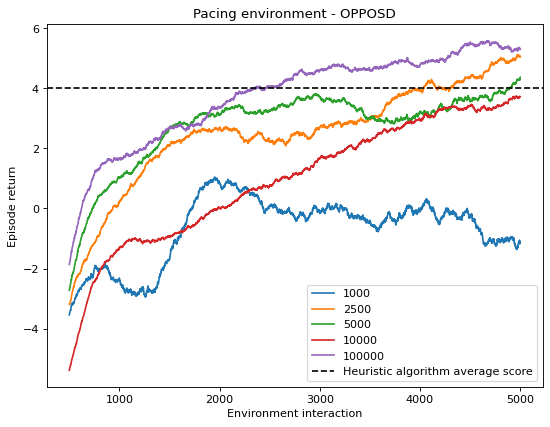

In [4]:
plot_data('opposd', 'random')

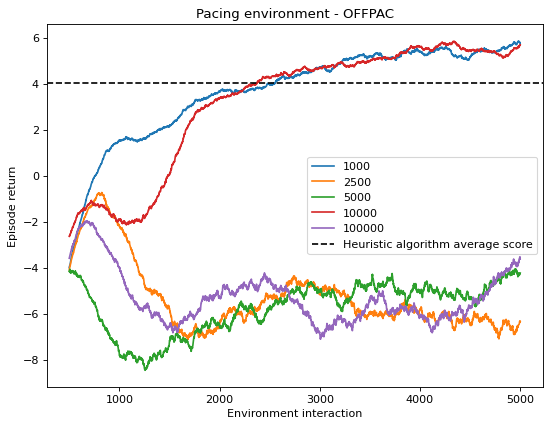

In [5]:
plot_data('offpac', 'random')

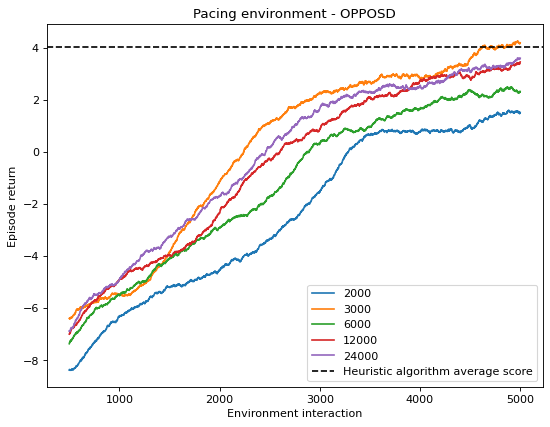

In [6]:
plot_data('opposd', 'experiment')

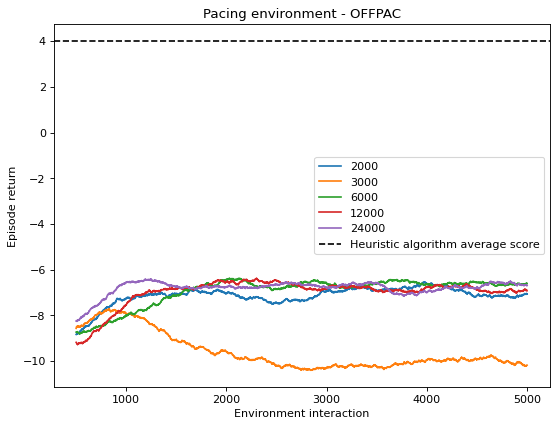

In [7]:
plot_data('offpac', 'experiment')

In [8]:
experiments = []
exp_type = ['random']
algorithms = ['offpac', 'opposd']
for type in exp_type:
    for alg in algorithms:
        return_dict = {}
        my_data = genfromtxt("show_work/%s_%s_%d.csv"%(type, alg, 100000), delimiter=',')
        return_dict.update({'algorithm' : alg,
                            'batch_origin' : type,
                            'data': my_data})
        experiments = np.append(experiments, return_dict)

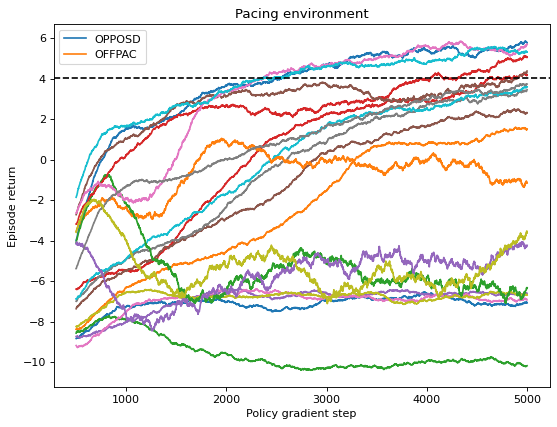

In [105]:
plt.figure(figsize=(8, 6), dpi=80)
i = 0

for exp in experiments:
        window = max(int(len(exp['data']) / 10), 1)
        # if len(exp.episode_losses) < window + 2: return
        returns = np.convolve(exp['data'], np.ones(window) / window, 'valid')
        # Determine x-axis based on samples or episodes
        x_returns = [i + window for i in range(len(returns))]
        plt.plot(x_returns, returns)
plt.axhline(y=4.01, color='k', linestyle='--', label='Heuristic algorithm average score')
plt.xlabel('Policy gradient step')
plt.ylabel('Episode return')
plt.legend(['OPPOSD', 'OFFPAC'])
plt.title('Pacing environment')
plt.savefig("generated_graphs/comp_5e3.pdf")

In [191]:
experiments_experimental = []
type = 'experiment'
alg = ['offpac', 'opposd']
experiment_sizes = [2000, 3000, 6000, 24000]
# experiment_sizes = [24000]
it = ['', '_1', '_2', '_3', '_4', '_5']
# it = ['', '_2', '_3']
# sizes = [experiment_sizes, random_sizes]
for alg in algorithms:
    for size in experiment_sizes:
        my_data = None
        return_dict = {}
        for i in it:
            file_data = genfromtxt("experiments_results/%s_%s_%d%s.csv"%(type, alg, size, i), delimiter=',')
            if my_data is None:
                my_data = [file_data]
            else:
                my_data = np.append(my_data, [file_data], axis=0)
        return_dict.update({'algorithm' : alg,
                            'batch_size' : size,
                            'batch_origin' : type,
                            'mean': np.mean(my_data, axis=0),
                            'std': np.std(my_data, axis=0)})
        experiments_experimental = np.append(experiments_experimental, return_dict)

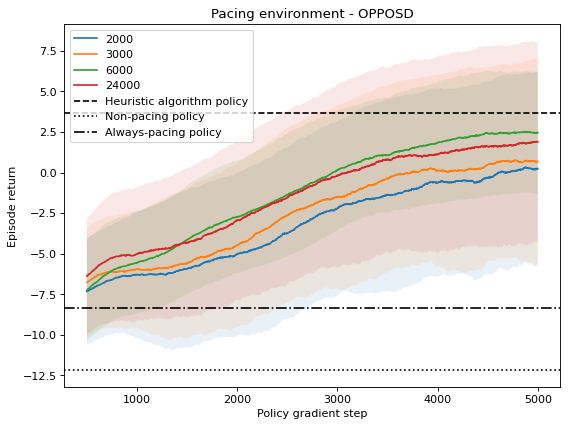

In [192]:
plot_data('opposd', 'experiment', experiments_experimental)

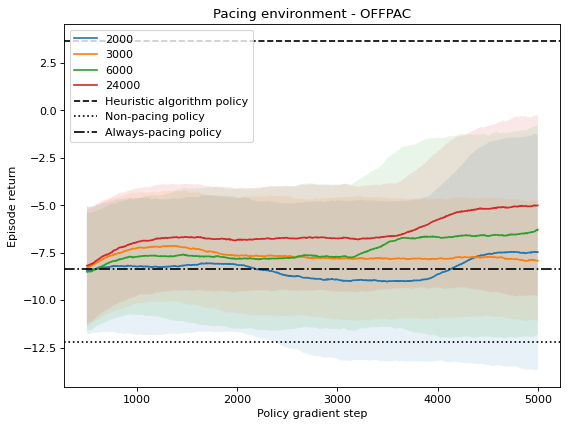

In [193]:
plot_data('offpac', 'experiment', experiments_experimental)

In [195]:
experiments_random = []
type = 'random'
algorithms = ['offpac', 'opposd']
experiment_sizes = [2500, 5000, 10000, 25000]
# experiment_sizes = [10000]
# experiment_sizes = [50000]
it = ['_1', '_2', '_3', '_4', '_5']
# it = ['', '_2', '_3']
# sizes = [experiment_sizes, random_sizes]
for alg in algorithms:
    for size in experiment_sizes:
        my_data = None
        return_dict = {}
        for i in it:
            file_data = genfromtxt("experiments_results/%s_%s_%d%s.csv"%(type, alg, size, i), delimiter=',')
            if my_data is None:
                my_data = [file_data]
            else:
                my_data = np.append(my_data, [file_data], axis=0)

        if size == 2500:
            size = 2000
        elif size == 5000:
            size = 3000
        elif size == 10000:
            size = 6000
        else:
            size = 24000

        if alg == 'offpac':
            algo = 'opposd'
        elif alg == 'opposd':
            algo = 'offpac'

        return_dict.update({'algorithm' : algo,
                            'batch_size' : size,
                            'batch_origin' : type,
                            'mean': np.mean(my_data, axis=0),
                            'std': np.std(my_data, axis=0)})
        experiments_random = np.append(experiments_random, return_dict)

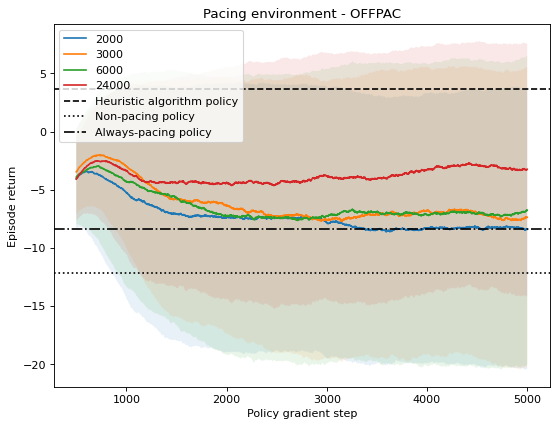

In [196]:
plot_data('offpac', 'random', experiments_random)

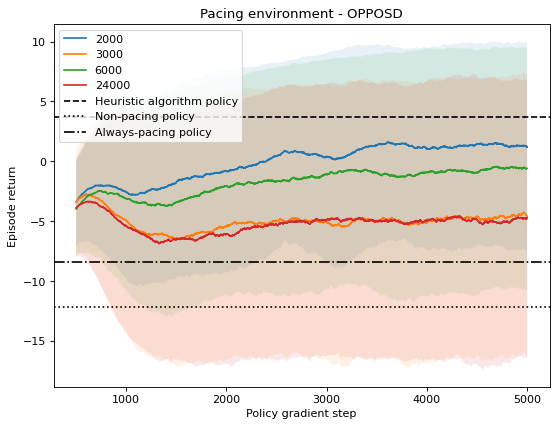

In [197]:
plot_data('opposd', 'random', experiments_random)

In [188]:
experiments_random = []
type = 'random'
algorithms = ['offpac', 'opposd']
experiment_sizes = [100000]
it = ['_1', '_2', '_3', '_4', '_5']
# it = ['', '_2', '_3']
# sizes = [experiment_sizes, random_sizes]
for alg in algorithms:
    for size in experiment_sizes:
        my_data = None
        return_dict = {}
        for i in it:
            file_data = genfromtxt("experiments_results/%s_%s_%d%s.csv"%(type, alg, size, i), delimiter=',')
            if my_data is None:
                my_data = [file_data]
            else:
                my_data = np.append(my_data, [file_data], axis=0)
        return_dict.update({'algorithm' : alg,
                            'batch_size' : size,
                            'batch_origin' : type,
                            'mean': np.mean(my_data, axis=0),
                            'std': np.std(my_data, axis=0)})
        experiments_random = np.append(experiments_random, return_dict)

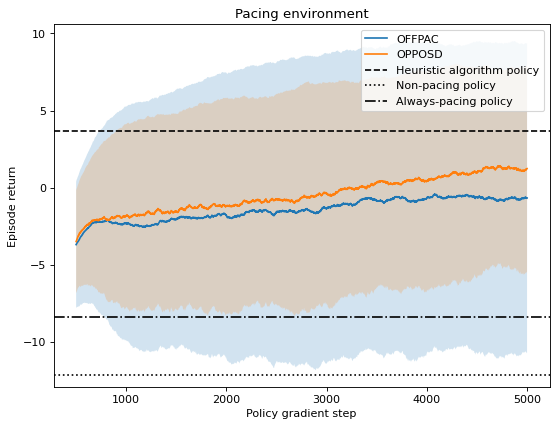

In [189]:
plt.figure(figsize=(8, 6), dpi=80)
i = 0

for exp in experiments_random:
    window = max(int(len(exp['mean']) / 10), 1)
    # if len(exp.episode_losses) < window + 2: return
    returns = np.convolve(exp['mean'], np.ones(window) / window, 'valid')
    errors = np.convolve(exp['std'], np.ones(window) / window, 'valid')
    # Determine x-axis based on samples or episodes
    x_returns = [i + window for i in range(len(returns))]
    # plt.plot(x_returns, returns, label='%d'%(exp['batch_size']))
    plt.fill_between(x_returns, returns-(errors), returns+(errors),alpha=0.2)
    plt.plot(x_returns, returns, label=exp['algorithm'].upper())
plt.axhline(y=3.67, color='k', linestyle='--', label='Heuristic algorithm policy')
plt.axhline(y=-12.184, color='k', linestyle=':', label='Non-pacing policy')
plt.axhline(y=-8.376, color='k', linestyle='-.', label='Always-pacing policy')
plt.xlabel('Policy gradient step')
plt.ylabel('Episode return')
plt.legend()
plt.title('Pacing environment')
plt.savefig("generated_graphs/comp_5e3.pdf")

In [159]:
experiments_results_long = []
types = ['random', 'experiment']
algorithms = ['opposd', 'offpac']
experiment_sizes = [2500]
# it = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10']
it = ['_5', '_6', '_7', '_8', '_9']
# it = ['', '_2', '_3']
# sizes = [experiment_sizes, random_sizes]
for type in types:
    for alg in algorithms:
        for size in experiment_sizes:
            my_data = None
            return_dict = {}
            for i in it:
                file_data = genfromtxt("experiments_results_long/%s_%s_%d%s.csv"%(type, alg, size, i), delimiter=',')
                if my_data is None:
                    my_data = [file_data]
                else:
                    my_data = np.append(my_data, [file_data], axis=0)
            dict_type = type
            dict_alg = alg
            if type == 'random':
                dict_type = 'simulator'
            if alg == 'opposd' and type == 'random':
                dict_alg = 'offpac'
            if alg == 'offpac' and type == 'random':
                dict_alg = 'opposd'
            return_dict.update({'algorithm' : dict_alg.upper(),
                                'batch_size' : size,
                                'batch_origin' : dict_type,
                                'mean': np.mean(my_data, axis=0),
                                'std': np.std(my_data, axis=0)})
            experiments_results_long = np.append(experiments_results_long, return_dict)

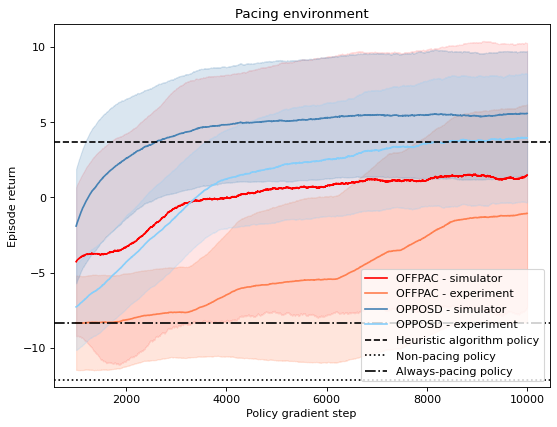

In [186]:
plt.figure(figsize=(8, 6), dpi=80)
i = 0
colors = ['red', 'steelblue', 'lightskyblue', 'coral']
# alphas = [0.05, 0.1, 0.1, 0.05]
alphas = [0.1, 0.2, 0.2, 0.2]
for num in [0, 3, 1, 2]:
    exp = experiments_results_long [num]
    window = max(int(len(exp['mean']) / 10), 1)
    # if len(exp.episode_losses) < window + 2: return
    returns = np.convolve(exp['mean'], np.ones(window) / window, 'valid')
    errors = np.convolve(exp['std'], np.ones(window) / window, 'valid')
    # Determine x-axis based on samples or episodes
    x_returns = [i + window for i in range(len(returns))]
    # plt.plot(x_returns, returns, label='%d'%(exp['batch_size']))
    plt.fill_between(x_returns, returns-(errors), returns+(errors), alpha=alphas[num], color=colors[num])
    plt.plot(x_returns, returns, color=colors[num], label='%s - %s' % (exp['algorithm'], exp['batch_origin']))
plt.axhline(y=3.67, color='k', linestyle='--', label='Heuristic algorithm policy')
plt.axhline(y=-12.184, color='k', linestyle=':', label='Non-pacing policy')
plt.axhline(y=-8.376, color='k', linestyle='-.', label='Always-pacing policy')
plt.xlabel('Policy gradient step')
plt.ylabel('Episode return')
plt.legend(loc=4)
plt.title('Pacing environment')
plt.savefig("generated_graphs/running_comp_10000_exp_batch.pdf")